# Data Processing Examples

The purpose of this simple Jupyter notebook is to help you interact with the tracked data if you are unfamiliar with python. We will show how you can access different sets of the data and perform calculations on it. You should run each cell in order. To do that put the cursor in the cell and hit "shift" + "Enter". We use data from Example 2 - Diffusing colloids so you need to have processed this before starting.

We start by importing the basic python libraries and give them pseudonyms pd, plt and np for brevity

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Import the datafile and check the basic structure of the data. If you have problems with this next step, make sure you navigated to the correct folder before running jupyter notebook or alternatively enter the full filepath details in data_filename. 

The data from the file is read into what is called a dataframe. By default the outputted dataframe has the name 'frame' which is also the name of a column. This can cause some issues so we start by renaming this to 'index'.

Typing the name of this dataframe prints out a shortened summary of the data it contains.

In [17]:
data_filename = 'colloids.hdf5'
dataframe = pd.read_hdf(data_filename)
dataframe.index.name='index'
dataframe

,frame,y,x,mass,size,ecc,signal,raw_mass,ep,particle,user_rad
index,,,,,,,,,,,
0,0,5.046040,218.174752,1210.174261,1.661444,0.318206,121.017426,3060.0,0.0,0,6
0,0,178.288605,37.711395,1125.102605,1.389907,0.150970,143.783081,2550.0,0.0,1,6
0,0,180.000000,176.223913,1653.505426,1.604116,0.005393,142.584888,4845.0,0.0,2,6
0,0,181.304383,16.676772,1462.393749,1.610341,0.111820,140.188504,4080.0,0.0,3,6
0,0,186.732520,198.028625,1276.673936,1.758401,0.385363,116.224657,3315.0,0.0,4,6
...,...,...,...,...,...,...,...,...,...,...,...
50,50,125.289805,88.967275,1876.808047,1.798101,0.029627,120.474777,6120.0,0.0,45,6
50,50,126.946381,62.350670,1101.399310,1.715721,0.306888,107.482399,2550.0,0.0,43,6
50,50,135.311489,156.441311,1423.846508,1.561274,0.181710,145.278408,3825.0,0.0,59,6


There are a number of groupings of data that we are generally interested in. 

1. The properties of all or a subset of particles in a particular frame
2. The properties of one particle in all frames or a subset of frames.

It can be helpful to extract this information first.



## Properties of all particles in a particular frame

We firstly extract a list of all the possible frame numbers contained in the dataframe. The index values are the same as the column 'frame'. We could also extract the values from the column labelled 'frame'. We use np.unique to remove duplicates.

Then we select the subsection of the dataframe where the frame number is 7. Finally we display the first 10 rows of this new dataframe.

In [18]:
all_frame_numbers = np.unique(dataframe.index.values)
all_frame_numbers_2 = np.unique(dataframe['frame'].values)

print('array of all the frame numbers')
print(all_frame_numbers_2)
frame_number = 7
frame_data = dataframe.loc[frame_number]
frame_data.head(n=10)

array of all the frame numbers
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


,frame,y,x,mass,size,ecc,signal,raw_mass,ep,particle,user_rad
index,,,,,,,,,,,
7,7,175.810753,38.000000,1117.911584,1.322672,0.058069,153.262072,2550.0,0.0,1,6
7,7,178.168907,300.827824,1654.629350,1.606946,0.129467,142.443573,4845.0,0.0,10,6
7,7,181.000000,174.501603,1500.165223,1.562276,0.042768,145.448712,4080.0,0.0,2,6
7,7,183.000000,18.000000,1042.182090,1.269825,0.171622,152.661044,2295.0,0.0,3,6
7,7,189.380428,153.066589,1037.974896,1.494634,0.016731,126.215824,2805.0,0.0,5,6
7,7,188.634908,198.792634,1501.367278,1.673272,0.248165,135.832268,4080.0,0.0,4,6
7,7,192.223576,305.242436,1529.615582,1.547417,0.110994,146.049739,4335.0,0.0,6,6
7,7,194.230769,42.754579,820.402856,1.502623,0.220510,107.583964,2040.0,0.0,7,6
7,7,212.503776,274.805891,1591.521438,1.641604,0.206605,139.438434,4590.0,0.0,11,6


Find the coordinates of particle 10 in this frame. NB the double square brackets when selecting two column names.

In [19]:
particle_number=10
new_frame_data = frame_data.set_index('particle')
new_frame_data.loc[particle_number][['x','y']]

x    300.827824
y    178.168907
Name: 10, dtype: float64

Trackpy provides the property "raw_mass" which is related to the intensity and size of the particles.
We use this as an example but any property derived from our tracking could be accessed in the same way. We will start by calculating the mean and standard deviation of the raw_mass and then plot a histogram.


mean:  2999.021739130435
std:  1127.8891885904086


Text(0, 0.5, 'Freq')

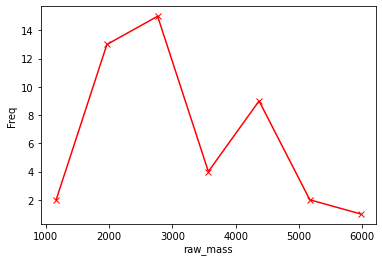

In [20]:
raw_mass = new_frame_data['raw_mass']

print('mean: ',raw_mass.mean())
print('std: ',raw_mass.std())

#Calculate the histogram
freq, bin_edges = np.histogram(raw_mass.values, bins=7)
bin_centres = 0.5*(bin_edges[1:] + bin_edges[:-1])

#Plot the histogram
plt.plot(bin_centres, freq, 'rx-')
plt.xlabel('raw_mass')
plt.ylabel('Freq')


## Properties of one particle in all frames

The alternative approach is to extract all the information about a single particle. We firstly move the particle column to the index (look at the left hand column in the printed dataframe you will see that index has been replaced by particle. We get the unique particle ids. This is useful because not all ids may exist. If you try and ask for an id that doesn't exist you'll get an error.

In [40]:
df = dataframe.set_index('particle')
print('array of all the particle ids - notice not all the numbers exist!')
particle_ids = np.unique(df.index.values)
print(particle_ids)

#Select a particle
particle_id = 9
particle_data = df.loc[particle_id]
new_particle_data = particle_data.set_index('frame')
new_particle_data.head()

array of all the particle ids - notice not all the numbers exist!
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 52 53
 55 57 59 63 64 66 67]


,y,x,mass,size,ecc,signal,raw_mass,ep,user_rad
frame,,,,,,,,,
0,210.070291,135.299029,1542.672635,1.578619,0.080378,144.382177,4590.0,0.0,6
1,210.000000,136.501603,1500.165223,1.562276,0.042768,145.448712,4080.0,0.0,6
2,209.445026,135.750302,1492.351862,1.573927,0.156049,144.246656,4080.0,0.0,6
3,210.111623,136.419639,1549.667962,1.586407,0.039415,143.851034,4335.0,0.0,6
4,212.070434,137.481982,1467.709725,1.583209,0.055545,141.241517,4335.0,0.0,6


Find coordinates of this particle in frame 9 and display the first few x and y values

In [41]:
frame_number = 9
new_particle_data.loc[frame_number][['x','y']].head()

x    137.519608
y    213.519608
Name: 9, dtype: float64

Calculate the root mean squared displacement relative to the starting point of a single particle as a function of frame number. 

We start by finding the coordinate os the start position. We then perform a calculation using the columns of the existing dataframe and store the result in a new column 'rms'.

We then show two methods to plot the data.

                y           x         mass      size       ecc      signal  \
frame                                                                        
0      210.070291  135.299029  1542.672635  1.578619  0.080378  144.382177   
1      210.000000  136.501603  1500.165223  1.562276  0.042768  145.448712   
2      209.445026  135.750302  1492.351862  1.573927  0.156049  144.246656   
3      210.111623  136.419639  1549.667962  1.586407  0.039415  143.851034   
4      212.070434  137.481982  1467.709725  1.583209  0.055545  141.241517   

       raw_mass   ep  user_rad       rms  
frame                                     
0        4590.0  0.0         6  0.000000  
1        4080.0  0.0         6  1.204626  
2        4080.0  0.0         6  0.771105  
3        4335.0  0.0         6  1.121372  
4        4335.0  0.0         6  2.960719  


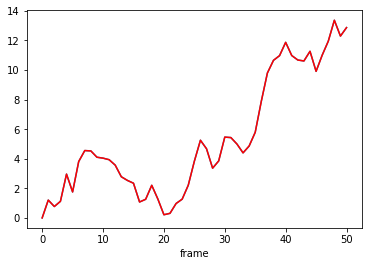

In [46]:
first_frame_of_particle = new_particle_data.index.min()
x_coord = new_particle_data['x'].loc[first_frame_of_particle]
y_coord = new_particle_data.loc[first_frame_of_particle]['y']

new_particle_data['rms'] = ((new_particle_data['x']-x_coord)**2 + (new_particle_data['y']-y_coord)**2)**0.5
print(new_particle_data.head())

#Plot using pandas
new_particle_data['rms'].plot()
#plot using matplotlib directly
frame_nums = new_particle_data['rms'].index.values
rms = new_particle_data['rms'].values
plt.plot(frame_nums, rms, 'r-')


## Following aggregate properties over time

Suppose instead that we wanted to work out how the average raw_mass of the particles varied with time. We could get each frame of data and calculate this average property for each and assemble. However, pandas gives us a cleaner alternative. We return to the full dataset. 

<AxesSubplot:xlabel='frame', ylabel='raw_mass'>

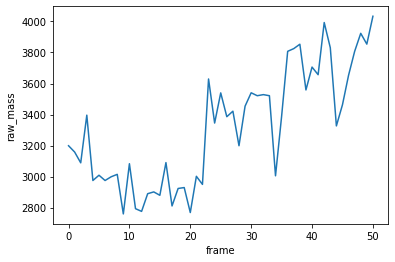

In [47]:
raw_mass_fn_frame = dataframe.groupby('frame')['raw_mass'].mean()
raw_mass_fn_frame.plot(ylabel='raw_mass')

Another likely scenario is that we wish to find out how a property of all the particles varies for all frames. For example, what is the mean x position and standard deviation of each particle.

In [48]:
mean_x = dataframe.groupby('particle')['x'].mean()
std_x = dataframe.groupby('particle')['x'].std()

print(mean_x)
print(std_x)

particle
0     217.922054
1      38.955594
2     176.749180
3      20.575994
4     197.298782
5     153.113229
6     308.807096
7      47.865331
9     134.059362
10    306.636897
11    277.585575
12    137.751501
13     17.025430
14     94.134532
15     86.770074
16    112.021896
17    140.946656
18    276.440752
19    207.306907
20    121.745515
21    110.563003
22     25.687164
24    127.629022
25    107.914269
26    276.054125
27    196.262239
28    119.016024
29     77.051388
30    180.234184
31    162.437972
32    130.290816
33    303.304738
34    227.582560
35    299.684241
36    223.477963
37    246.878899
38     78.157584
39    229.816756
40    149.059873
41     46.099652
42     32.045017
43     59.332226
44    192.426916
45     89.226213
46    190.062919
47    237.812476
52      2.651521
53    305.890734
55     36.316305
57    122.841810
59    158.253323
63     34.636969
64      5.244893
66    211.906394
67    190.190616
Name: x, dtype: float64
particle
0     0.768383
1     0.

## Filtering data

Suppose you now want to filter the data so that you only look at measurements that meet a certain criteria. We will give two examples:
1. Filtering the original dataframe based on the internal values. We will find the data of those particles with a raw_mass > 3000.
2. Filtering the original dataframe based on values calculated in the groupby operations above. We will find the data of those particles which have large fluctuations. ie have a standard deviation >  3.

We also choose only to display the columns that might be interesting.

In [51]:
#Example 1
filter_data_1 = dataframe[dataframe['raw_mass'] > 3000]
print('Example 1', filter_data_1[['frame','x','y','raw_mass','size','particle']].head())

#Example 2
particle_ids = std_x[std_x > 3].index.values

print('\n')
print('particle ids',particle_ids)
print('\n')

filter_data_2 = dataframe[dataframe['particle'].isin(particle_ids)]
print('Example 2',filter_data_2[['frame','x','y','raw_mass','size','particle']].head())

Example 1        frame           x           y  raw_mass      size  particle
index                                                             
0          0  218.174752    5.046040    3060.0  1.661444         0
0          0  176.223913  180.000000    4845.0  1.604116         2
0          0   16.676772  181.304383    4080.0  1.610341         3
0          0  198.028625  186.732520    3315.0  1.758401         4
0          0  306.443770  189.252023    4080.0  1.575757         6


particle ids [ 2  3  6  7 10 11 13 17 18 20 24 25 29 36 37 38 39 40 41 43 44 45 55]


Example 2        frame           x           y  raw_mass      size  particle
index                                                             
0          0  176.223913  180.000000    4845.0  1.604116         2
0          0   16.676772  181.304383    4080.0  1.610341         3
0          0  306.443770  189.252023    4080.0  1.575757         6
0          0   43.788741  196.263494    2550.0  1.357253         7
0          0  295.828

## Outputting data

It is possible to assemble all this data back into a master dataframe however we have purposefully tried to keep everything as straight forward as possible. Doing a basic tutorial on Pandas will help you do more advanced things with the data. If you have calculated the data you probably now want to export it to a file. Taking the name of the dataframe you want to export you can then export to a csv, excel.

In [52]:
output_filename_csv = 'new_data.csv'
output_filename_excel = 'new_data.xlsx'

filter_data_2.to_csv(output_filename_csv)
filter_data_2.to_excel(output_filename_excel)